<a href="https://colab.research.google.com/github/MokshadaDaga/PRODIGY_ML_01/blob/main/Lab_5__ML_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LAB 5
## Decision Tree Classifier

## Aim :- To build a Decision Tree Classifier to predict the safety of the car. Build two models, one with criterion gini index and another one with criterion entropy.

## Step 1 :- Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [5]:
import os
import pandas as pd

data = '/kaggle/input/car-evaluation-data-set/car_evaluation.csv'

# Check if the file exists
if os.path.exists(data):
    df = pd.read_csv(data)
else:
    print(f"Error: File not found at {data}. Please check the file path.")

Error: File not found at /kaggle/input/car-evaluation-data-set/car_evaluation.csv. Please check the file path.


## Step 2 :- Import Dataset

In [7]:
df = pd.read_csv('car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


## Step 3:- Exploratory data analysis

In [9]:
df.shape

(1727, 7)

In [11]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [12]:
df.tail()

,vhigh,vhigh.1,2,2.1,small,low,unacc
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [13]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [15]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:

    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [16]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [17]:
X = df.drop(['class'], axis=1)

y = df['class']

## Step 4:- Splitting the dataset

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [19]:
X_train.shape, X_test.shape


((1157, 6), (570, 6))

In [20]:

X_train.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


In [21]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [23]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [24]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,high,high,4,2,big,low
932,med,vhigh,4,4,big,low
628,high,high,5more,2,big,high
1497,low,high,5more,4,med,med
1262,med,low,4,more,med,low


## Decision Tree Classifier with Gini Index

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming X_train contains the column with 'vhigh' values,
# replace 'buying' with the actual column name if 'buying' is the column you are targeting.
# Please inspect your X_train dataframe to identify the correct column name.
column_name = 'buying'  # Replace 'buying' with the actual column name

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to the unique values in the column
label_encoder.fit(X_train[column_name].unique())

# Transform the column in both training and test sets
X_train[column_name] = label_encoder.transform(X_train[column_name])
X_test[column_name] = label_encoder.transform(X_test[column_name])

In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train contains the column with 'vhigh' values,
# replace 'buying' with the actual column name if 'buying' is not the correct column
# Please inspect your X_train dataframe to identify the correct column name.
columns_to_encode = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']  # Add all relevant columns here

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over all columns to be encoded and transform in both X_train and X_test
for column in columns_to_encode:
    # Fit the encoder to the unique values in the column, considering both train and test data
    label_encoder.fit(pd.concat([X_train[column], X_test[column]]).unique())

    # Transform the column in both training and test sets
    X_train[column] = label_encoder.transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])


clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [33]:
y_pred_gini = clf_gini.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7965


In [35]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'acc', 'acc', ..., 'unacc', 'unacc', 'acc'], dtype=object)

In [36]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7718


In [37]:

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7718
Test set score: 0.7965


[Text(0.375, 0.875, 'x[3] <= 0.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 377\nvalue = [0, 0, 377, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[5] <= 0.5\ngini = 0.576\nsamples = 780\nvalue = [257, 51, 433, 39]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[0] <= 2.5\ngini = 0.626\nsamples = 256\nvalue = [138, 19, 60, 39]'),
 Text(0.125, 0.125, 'gini = 0.615\nsamples = 189\nvalue = [106, 19, 25, 39]'),
 Text(0.375, 0.125, 'gini = 0.499\nsamples = 67\nvalue = [32, 0, 35, 0]'),
 Text(0.75, 0.375, 'x[5] <= 1.5\ngini = 0.438\nsamples = 524\nvalue = [119, 32, 373, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 256\nvalue = [0, 0, 256, 0]'),
 Text(0.875, 0.125, 'gini = 0.598\nsamples = 268\nvalue = [119, 32, 117, 0]')]

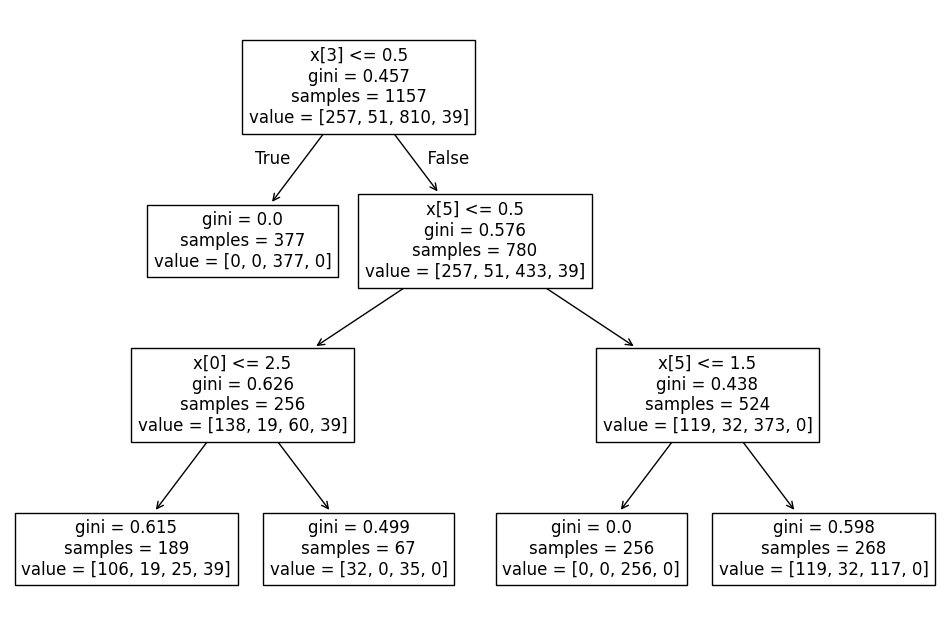

In [38]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

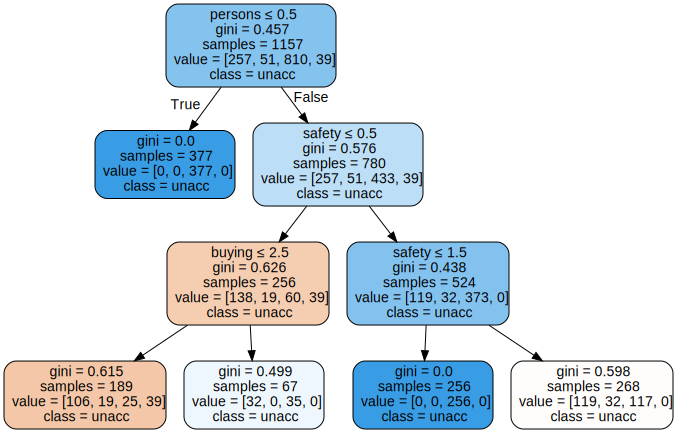

In [39]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

## Decision Tree Classifier with Entropy

In [40]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [41]:
y_pred_en = clf_en.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7965


In [43]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'acc', 'acc', ..., 'unacc', 'unacc', 'acc'], dtype=object)

In [44]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7718


In [45]:

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7718
Test set score: 0.7965


[Text(0.375, 0.875, 'x[3] <= 0.5\nentropy = 1.206\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 377\nvalue = [0, 0, 377, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[5] <= 0.5\nentropy = 1.472\nsamples = 780\nvalue = [257, 51, 433, 39]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[0] <= 2.5\nentropy = 1.663\nsamples = 256\nvalue = [138, 19, 60, 39]'),
 Text(0.125, 0.125, 'entropy = 1.657\nsamples = 189\nvalue = [106, 19, 25, 39]'),
 Text(0.375, 0.125, 'entropy = 0.999\nsamples = 67\nvalue = [32, 0, 35, 0]'),
 Text(0.75, 0.375, 'x[5] <= 1.5\nentropy = 1.081\nsamples = 524\nvalue = [119, 32, 373, 0]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 256\nvalue = [0, 0, 256, 0]'),
 Text(0.875, 0.125, 'entropy = 1.408\nsamples = 268\nvalue = [119, 32, 117, 0]')]

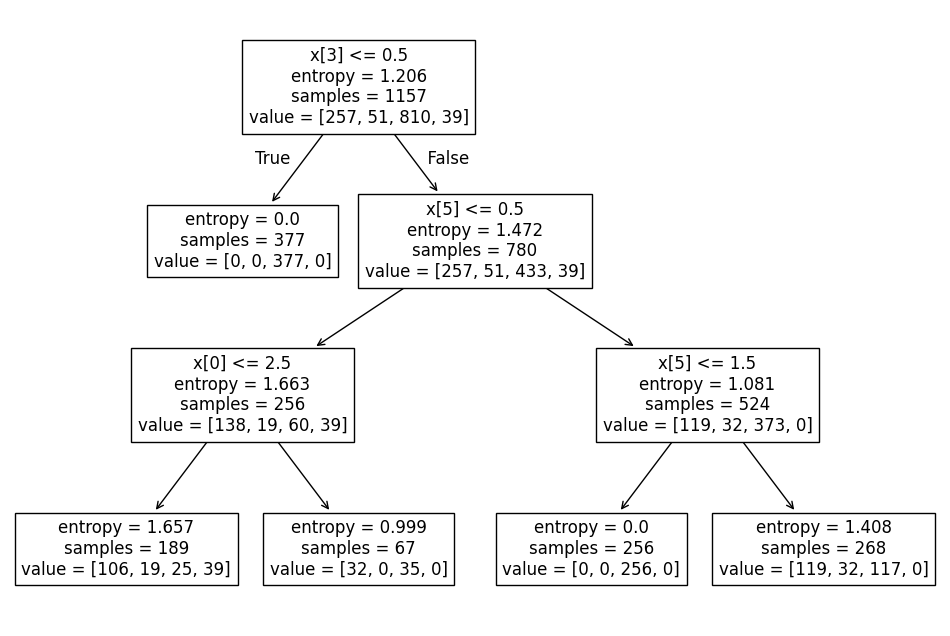

In [46]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

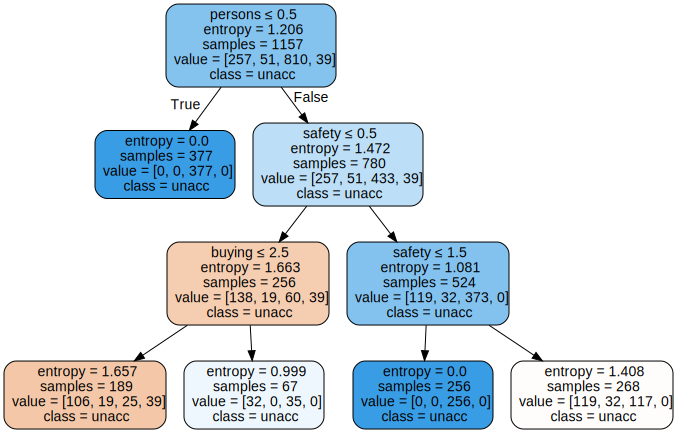

In [47]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[113   0  14   0]
 [ 18   0   0   0]
 [ 58   0 341   0]
 [ 26   0   0   0]]


In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.53      0.89      0.66       127
        good       0.00      0.00      0.00        18
       unacc       0.96      0.85      0.90       399
       vgood       0.00      0.00      0.00        26

    accuracy                           0.80       570
   macro avg       0.37      0.44      0.39       570
weighted avg       0.79      0.80      0.78       570

